In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

In [9]:
# Load the dataset dataset_5secondWindow.csv

df = pd.read_csv('dataset_halfSecondWindow.csv', index_col=0)
df

,id,time,activityrecognition#0,activityrecognition#1,android.sensor.accelerometer#mean,android.sensor.accelerometer#min,android.sensor.accelerometer#max,android.sensor.accelerometer#std,android.sensor.game_rotation_vector#mean,android.sensor.game_rotation_vector#min,...,sound#mean,sound#min,sound#max,sound#std,speed#mean,speed#min,speed#max,speed#std,target,user
0,156661,3.0,NaN,62.0,10.053802,4.328630,14.419712,2.359507,0.629076,0.436463,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Bus,U12
1,156662,4.0,NaN,62.0,10.687402,6.373194,16.329818,2.912315,0.577839,0.376494,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Bus,U12
2,156663,5.0,NaN,62.0,11.816800,4.817410,16.854629,3.199759,0.651511,0.585485,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Bus,U12
3,156664,6.0,NaN,62.0,9.401312,6.124588,12.230792,1.572354,0.713226,0.693072,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Bus,U12
4,156665,7.0,NaN,62.0,10.389851,5.313790,38.533453,5.426978,0.707375,0.684707,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Bus,U12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62580,82695,4066.0,NaN,51.0,10.105329,10.089159,10.135641,0.026270,0.834765,0.834765,...,89.761985,89.761985,89.761985,NaN,0.00,0.00,0.00,NaN,Walking,U1
62581,77608,604.0,NaN,100.0,9.544118,9.544118,9.544118,14.491194,0.965309,0.965309,...,89.747010,89.747010,89.747010,NaN,1.50,1.50,1.50,NaN,Walking,U1
62582,85219,1341.0,NaN,100.0,14.258467,14.258467,14.258467,0.829544,0.773370,0.773370,...,89.729460,89.729460,89.729460,NaN,0.00,0.00,0.00,NaN,Walking,U1
62583,69368,1186.0,NaN,90.0,10.726491,10.726491,10.726491,7.089701,0.789832,0.789832,...,89.778343,89.778343,89.778343,NaN,1.00,1.00,1.00,NaN,Walking,U1


In [10]:
# Make a copy of the main dataset

df_copy = df.copy()
df_copy.head()

,id,time,activityrecognition#0,activityrecognition#1,android.sensor.accelerometer#mean,android.sensor.accelerometer#min,android.sensor.accelerometer#max,android.sensor.accelerometer#std,android.sensor.game_rotation_vector#mean,android.sensor.game_rotation_vector#min,...,sound#mean,sound#min,sound#max,sound#std,speed#mean,speed#min,speed#max,speed#std,target,user
0,156661,3.0,NaN,62.0,10.053802,4.328630,14.419712,2.359507,0.629076,0.436463,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Bus,U12
1,156662,4.0,NaN,62.0,10.687402,6.373194,16.329818,2.912315,0.577839,0.376494,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Bus,U12
2,156663,5.0,NaN,62.0,11.816800,4.817410,16.854629,3.199759,0.651511,0.585485,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Bus,U12
3,156664,6.0,NaN,62.0,9.401312,6.124588,12.230792,1.572354,0.713226,0.693072,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Bus,U12
4,156665,7.0,NaN,62.0,10.389851,5.313790,38.533453,5.426978,0.707375,0.684707,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Bus,U12


In [11]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 62585 entries, 0 to 62584
Data columns (total 70 columns):
 #   Column                                           Non-Null Count  Dtype  
---  ------                                           --------------  -----  
 0   id                                               62585 non-null  int64  
 1   time                                             62585 non-null  float64
 2   activityrecognition#0                            0 non-null      float64
 3   activityrecognition#1                            62585 non-null  float64
 4   android.sensor.accelerometer#mean                62585 non-null  float64
 5   android.sensor.accelerometer#min                 62585 non-null  float64
 6   android.sensor.accelerometer#max                 62585 non-null  float64
 7   android.sensor.accelerometer#std                 62583 non-null  float64
 8   android.sensor.game_rotation_vector#mean         54000 non-null  float64
 9   android.sensor.game_rotation

In [12]:
df_copy.columns

Index(['id', 'time', 'activityrecognition#0', 'activityrecognition#1',
       'android.sensor.accelerometer#mean', 'android.sensor.accelerometer#min',
       'android.sensor.accelerometer#max', 'android.sensor.accelerometer#std',
       'android.sensor.game_rotation_vector#mean',
       'android.sensor.game_rotation_vector#min',
       'android.sensor.game_rotation_vector#max',
       'android.sensor.game_rotation_vector#std',
       'android.sensor.gravity#mean', 'android.sensor.gravity#min',
       'android.sensor.gravity#max', 'android.sensor.gravity#std',
       'android.sensor.gyroscope#mean', 'android.sensor.gyroscope#min',
       'android.sensor.gyroscope#max', 'android.sensor.gyroscope#std',
       'android.sensor.gyroscope_uncalibrated#mean',
       'android.sensor.gyroscope_uncalibrated#min',
       'android.sensor.gyroscope_uncalibrated#max',
       'android.sensor.gyroscope_uncalibrated#std',
       'android.sensor.light#mean', 'android.sensor.light#min',
       'android.se

In [13]:
df_copy.isnull().sum().sort_values(ascending=False).head(45)

activityrecognition#0                              62585
android.sensor.step_counter#std                    61698
sound#std                                          61111
speed#std                                          60894
android.sensor.proximity#std                       59636
android.sensor.pressure#std                        53653
android.sensor.proximity#max                       50308
android.sensor.proximity#mean                      50308
android.sensor.proximity#min                       50308
android.sensor.light#std                           49661
android.sensor.step_counter#mean                   46974
android.sensor.step_counter#min                    46974
android.sensor.step_counter#max                    46974
android.sensor.pressure#max                        42214
android.sensor.pressure#min                        42214
android.sensor.pressure#mean                       42214
speed#mean                                         25920
speed#min                      

ValueError: The number of FixedLocator locations (0), usually from a call to set_ticks, does not match the number of ticklabels (70).

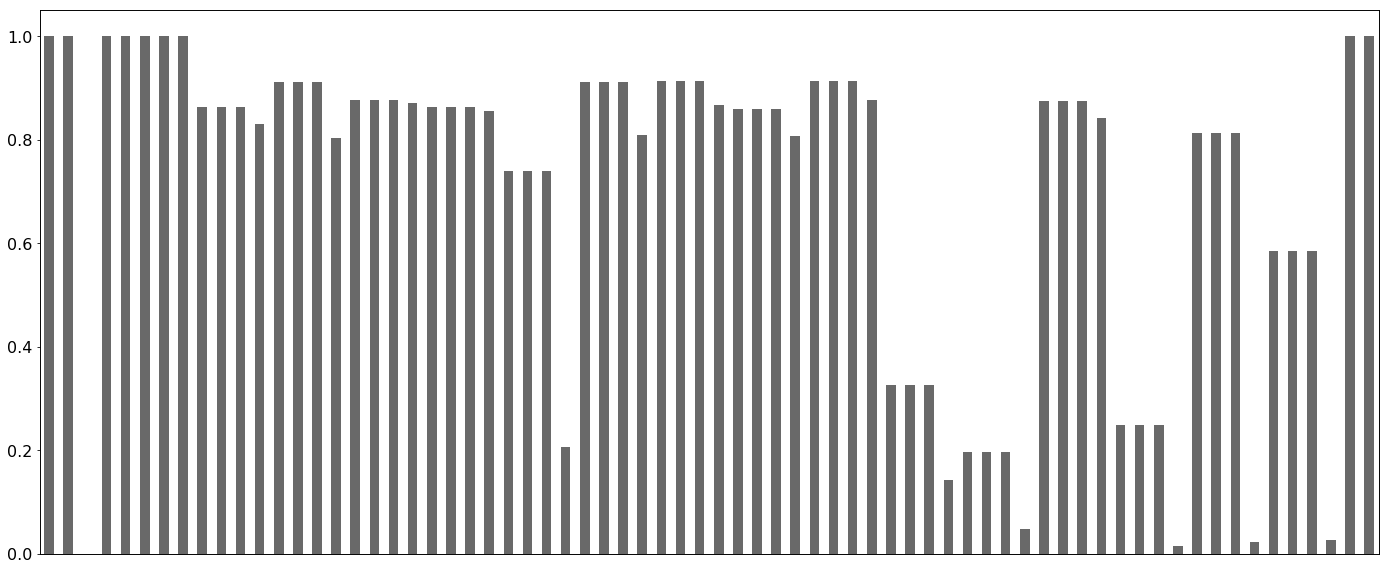

In [14]:
# Gives a bar chart of the missing values

msno.bar(df_copy)

<Figure size 7200x4320 with 0 Axes>

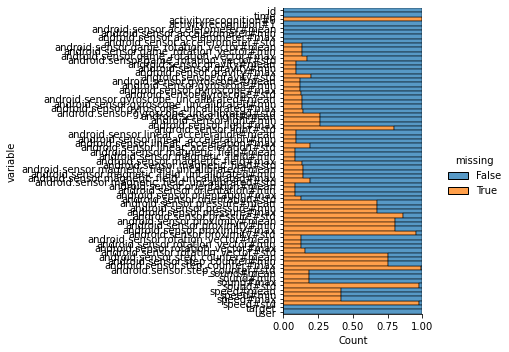

In [15]:
plt.figure(figsize=(100,60))
sns.displot(
    data=df_copy.isna().melt(value_name="missing"),
    y="variable",
    hue="missing",
    multiple="fill",
    aspect=1.25
)
plt.savefig("visualizing_missing_data_with_barplot_Seaborn_distplot.jpg", dpi=150)

<AxesSubplot:>

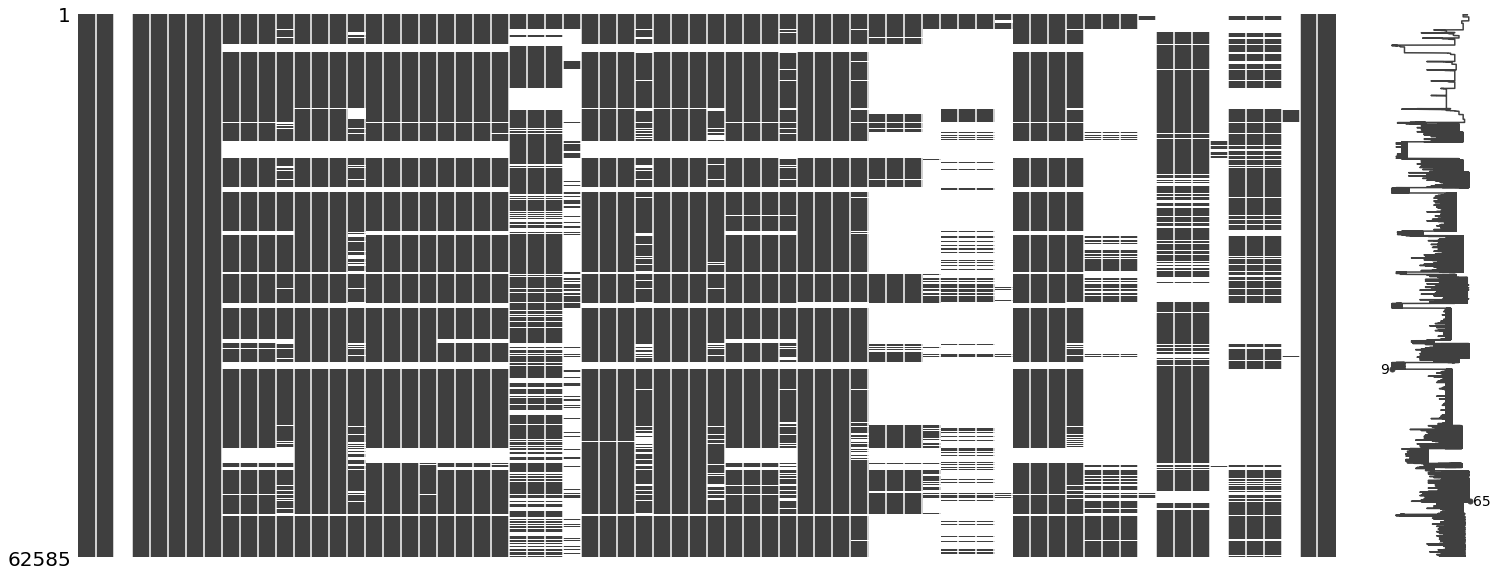

In [16]:
# Gives positional information of the missing values

msno.matrix(df_copy)

<AxesSubplot:>

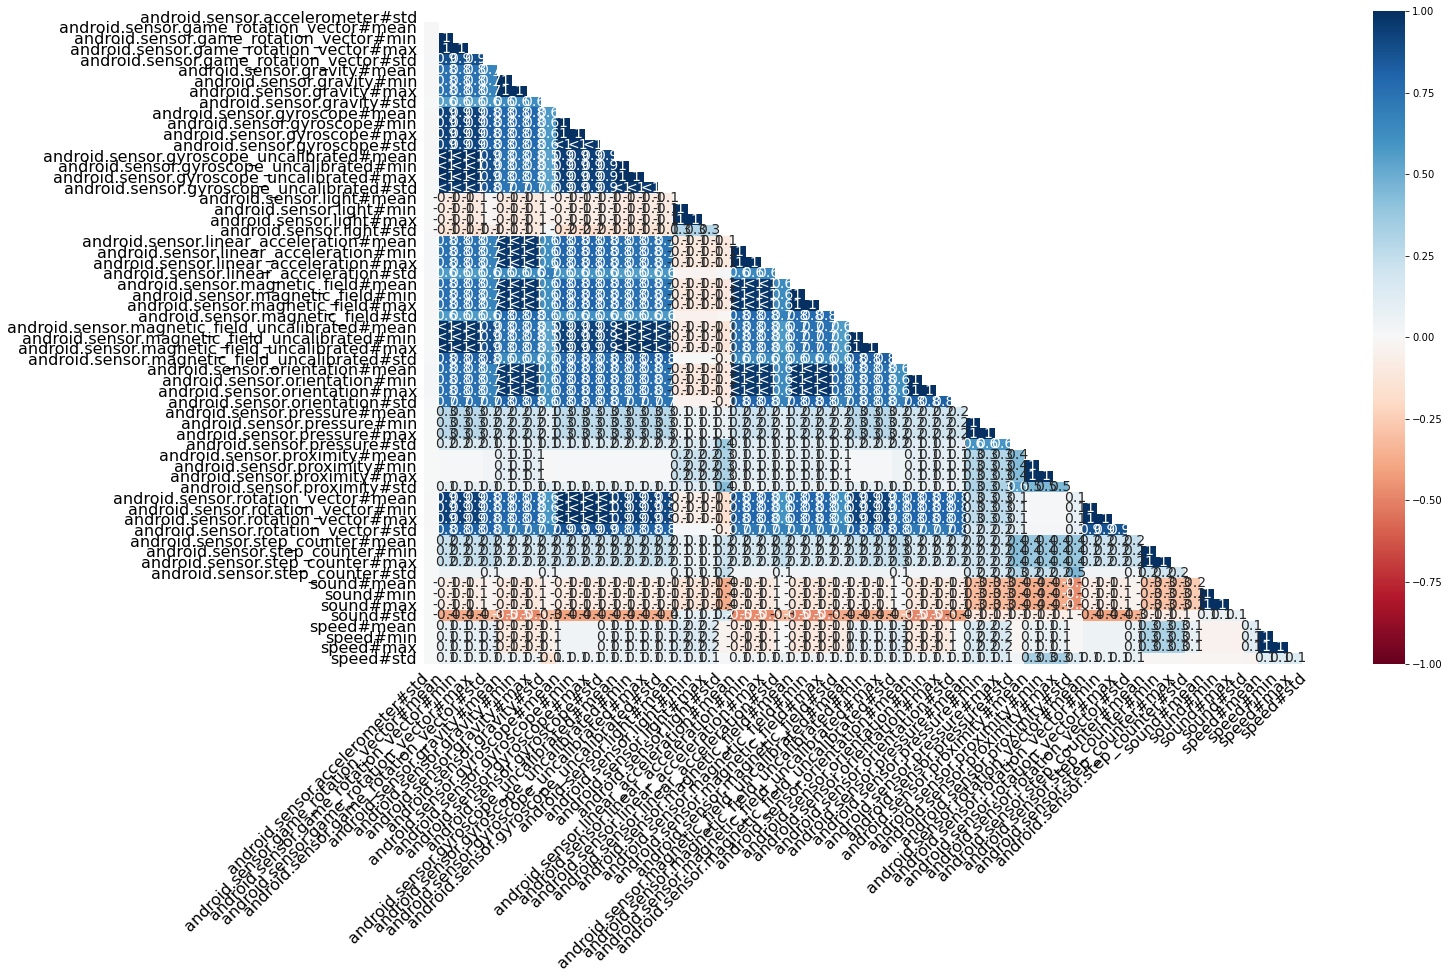

In [17]:
# Gives a heatmap of how missing values are related

msno.heatmap(df_copy)

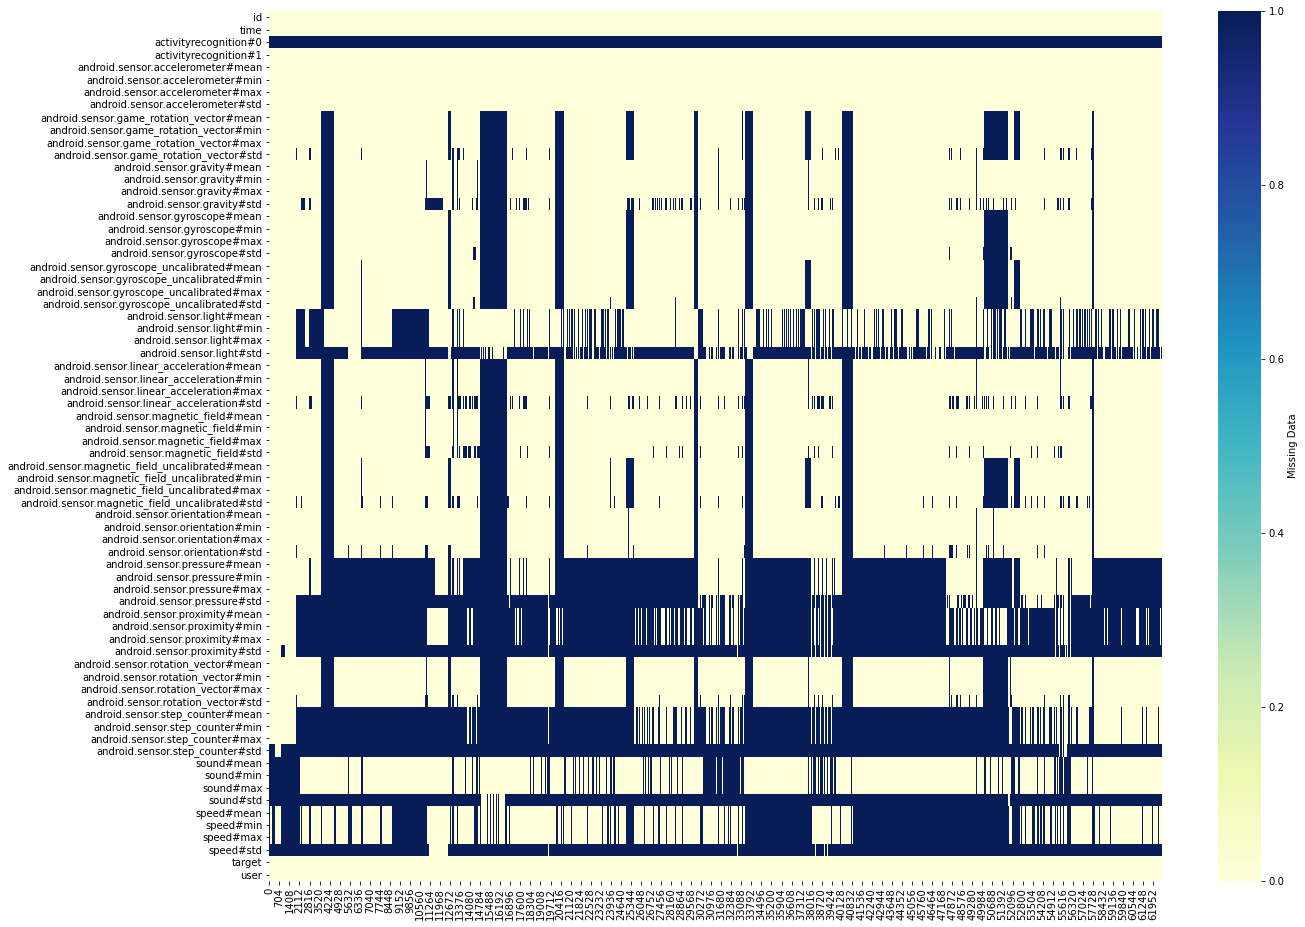

In [18]:
plt.figure(figsize=(20,16))
sns.heatmap(df_copy.isna().transpose(),
            cmap="YlGnBu",
            cbar_kws={'label': 'Missing Data'})
plt.savefig("visualizing_missing_data_with_heatmap_Seaborn_Python.png", dpi=100)

In [19]:
df_copy['user'].value_counts()

U1     25700
U12     9081
U10     5717
U7      4228
U3      3522
U6      3029
U2      2897
U4      2434
U8      2229
U11     1780
U13      957
U9       825
U5       186
Name: user, dtype: int64

In [20]:
df_copy['target'].value_counts()

Car        12518
Bus        12517
Train      12517
Walking    12517
Still      12516
Name: target, dtype: int64

c:\Users\andre\anaconda3\envs\ML\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='user', ylabel='count'>

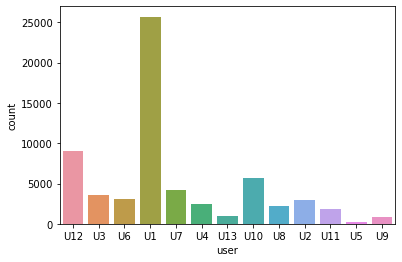

In [21]:
sns.countplot(df_copy['user'])

In [22]:
df1 = df_copy.groupby(['user'])[['target']].count()
df1

,target
user,
U1,25700
U10,5717
U11,1780
U12,9081
U13,957
U2,2897
U3,3522
U4,2434
U5,186


In [23]:
df2 = df_copy.groupby(['target'])[['user']].count()
df2

,user
target,
Bus,12517
Car,12518
Still,12516
Train,12517
Walking,12517


In [24]:
df3 = df_copy.groupby(['user', 'target'], as_index=False).count()
df3

,user,target,id,time,activityrecognition#0,activityrecognition#1,android.sensor.accelerometer#mean,android.sensor.accelerometer#min,android.sensor.accelerometer#max,android.sensor.accelerometer#std,...,android.sensor.step_counter#max,android.sensor.step_counter#std,sound#mean,sound#min,sound#max,sound#std,speed#mean,speed#min,speed#max,speed#std
0,U1,Bus,6425,6425,0,6425,6425,6425,6425,6425,...,0,0,6206,6206,6206,0,3349,3349,3349,0
1,U1,Car,4391,4391,0,4391,4391,4391,4391,4390,...,0,0,3424,3424,3424,0,3987,3987,3987,0
2,U1,Still,3654,3654,0,3654,3654,3654,3654,3654,...,0,0,3624,3624,3624,0,0,0,0,0
3,U1,Train,6486,6486,0,6486,6486,6486,6486,6486,...,0,0,6463,6463,6463,0,0,0,0,0
4,U1,Walking,4744,4744,0,4744,4744,4744,4744,4743,...,4451,0,4675,4675,4675,0,4304,4304,4304,0
5,U10,Car,1081,1081,0,1081,1081,1081,1081,1081,...,330,0,698,698,698,0,952,952,952,0
6,U10,Still,4180,4180,0,4180,4180,4180,4180,4180,...,2721,0,3275,3275,3275,0,3697,3697,3697,0
7,U10,Walking,456,456,0,456,456,456,456,456,...,315,0,233,233,233,42,247,247,247,0
8,U11,Car,1780,1780,0,1780,1780,1780,1780,1780,...,147,0,1166,1166,1166,0,1742,1742,1742,90
9,U12,Bus,1867,1867,0,1867,1867,1867,1867,1867,...,1867,466,0,0,0,0,549,549,549,0


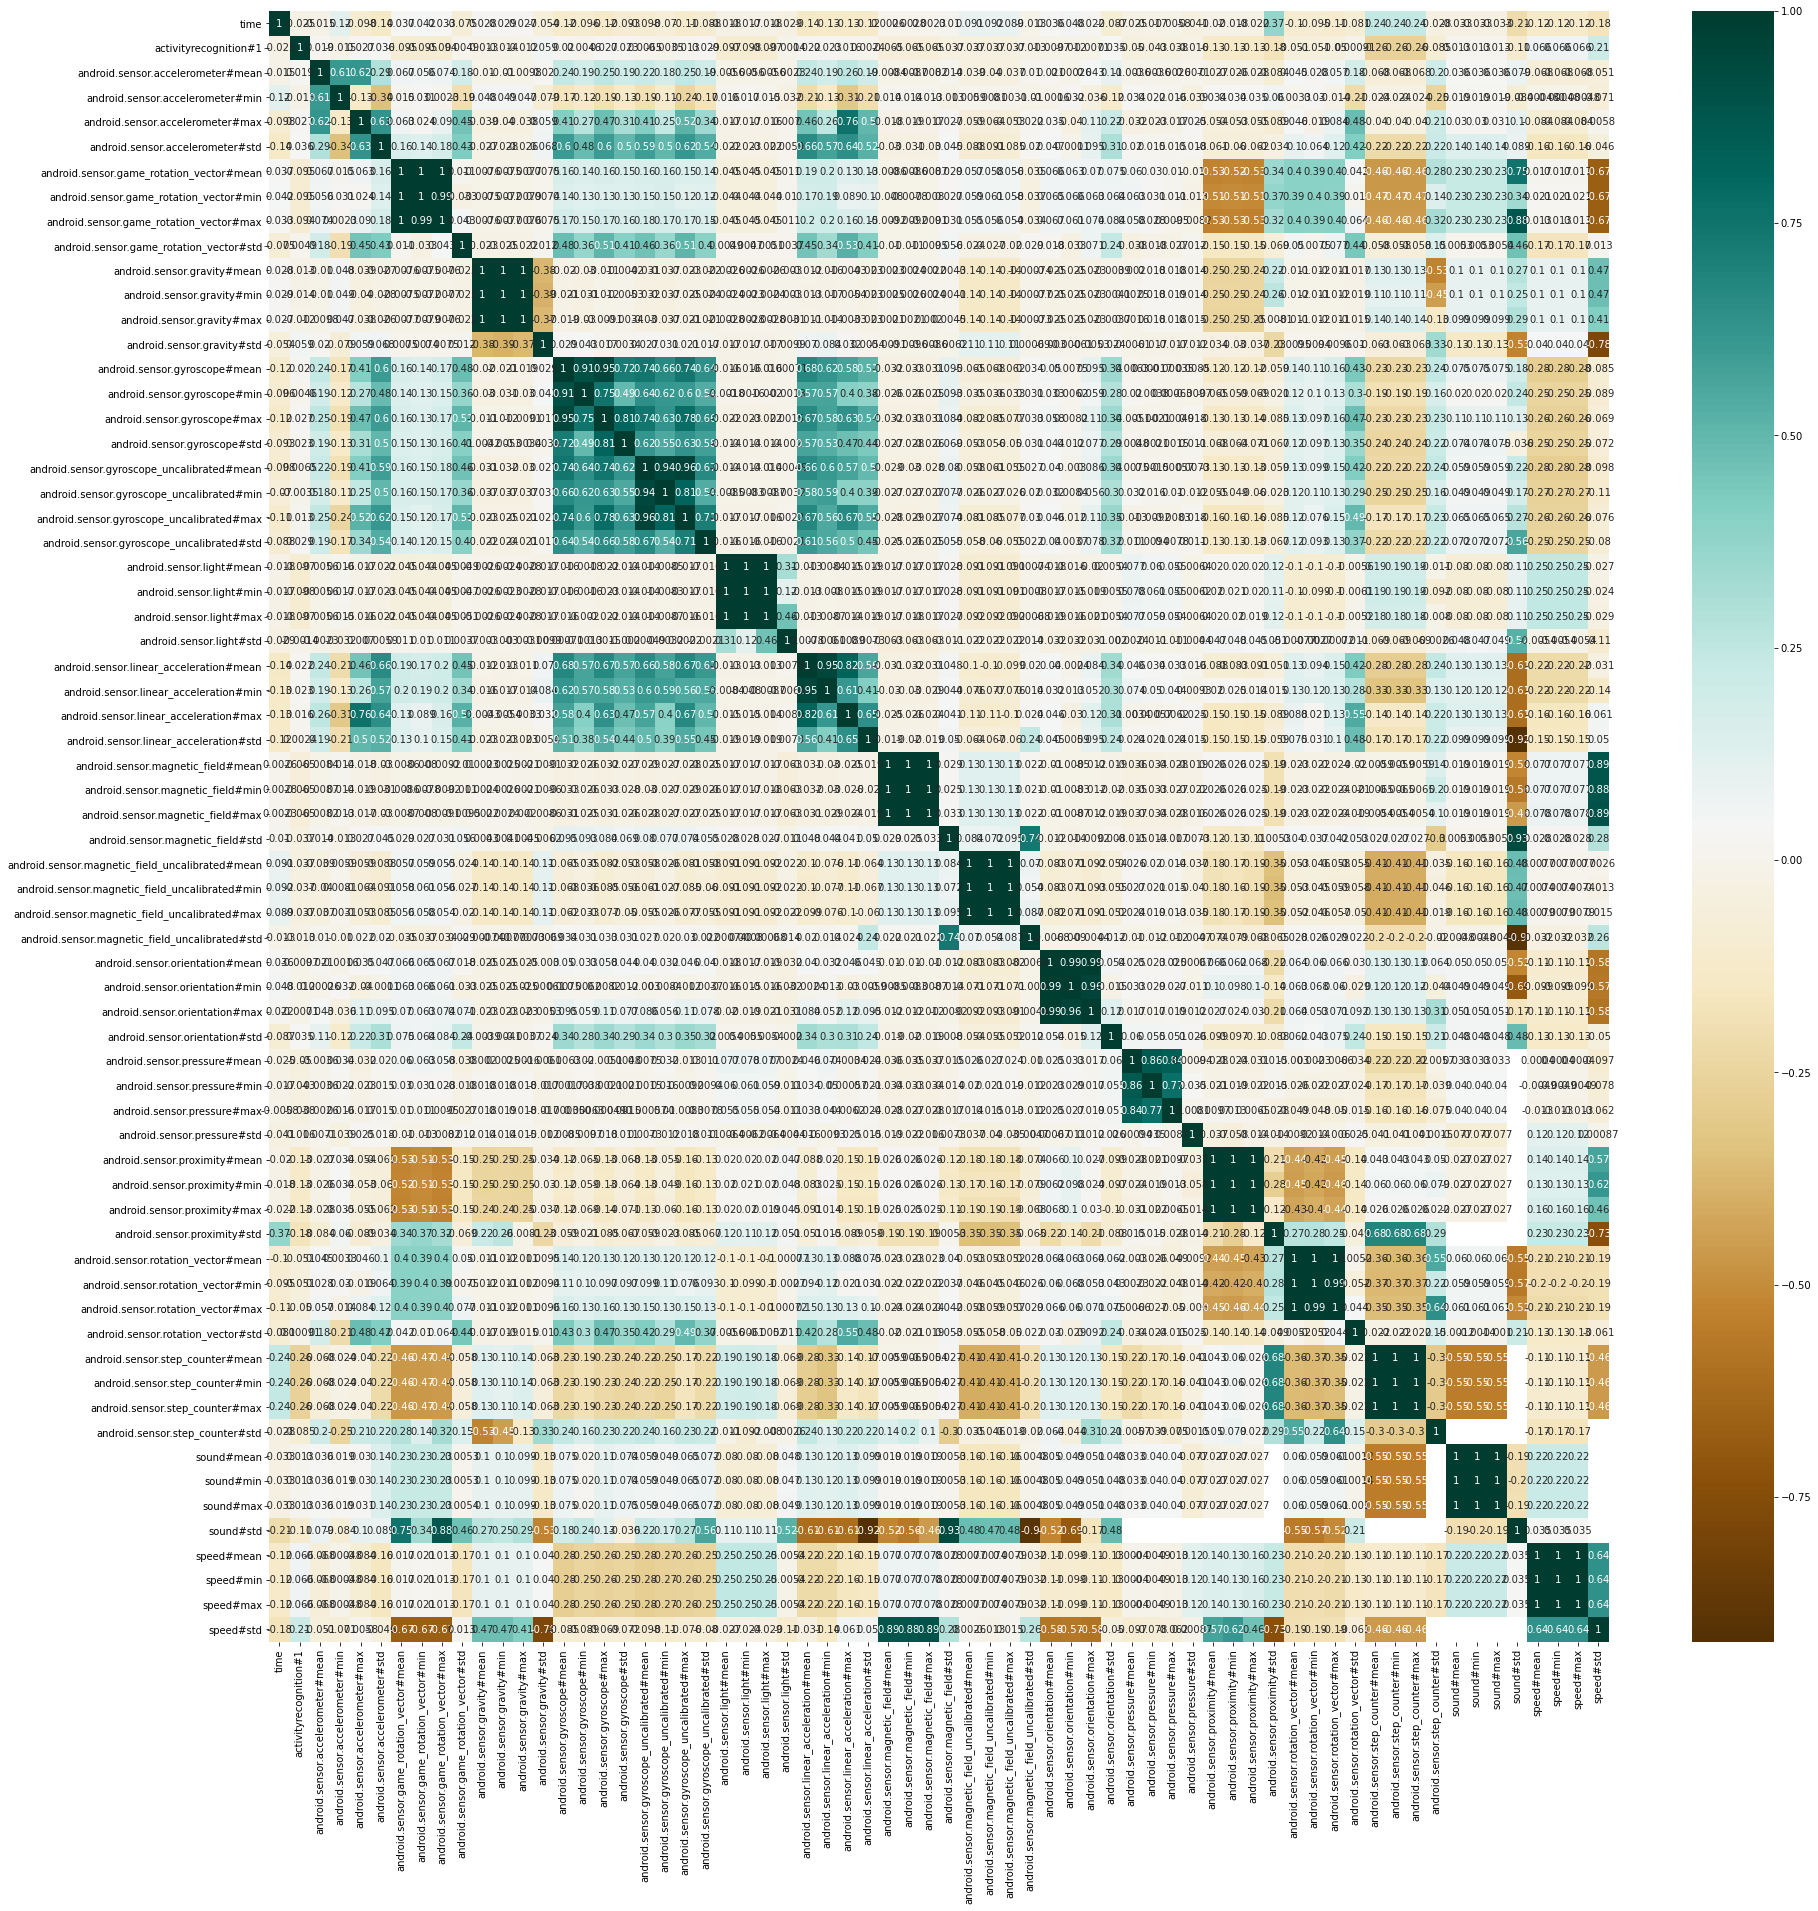

In [25]:
fig, ax = plt.subplots(figsize=(30,30))
ax = sns.heatmap((df_copy.drop(['target', 'user', 'id', 'activityrecognition#0'], axis=1)).corr(), cmap= 'BrBG',annot=True)

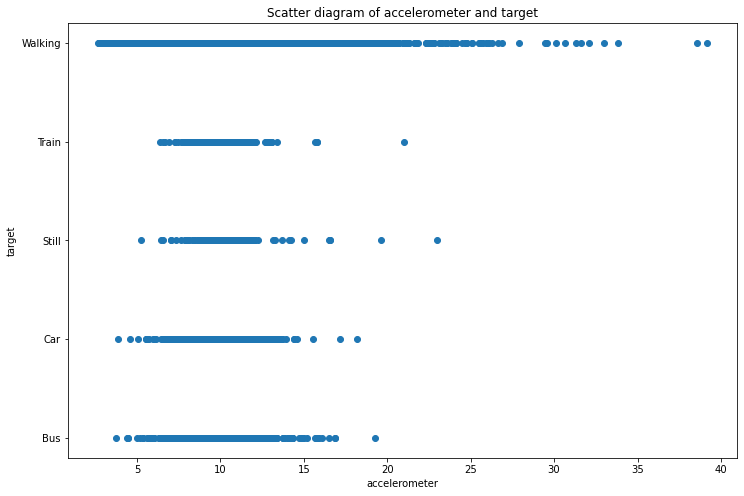

In [29]:
# Used the sensor.accelerometer

x = df_copy['android.sensor.accelerometer#mean']
y = df_copy['target']

plt.figure(figsize=(12, 8))
plt.scatter(x,y)
plt.title('Scatter diagram of accelerometer and target')
plt.xlabel('accelerometer')
plt.ylabel('target')
plt.savefig('Scatter diagram of accelerometer and target.jpg')

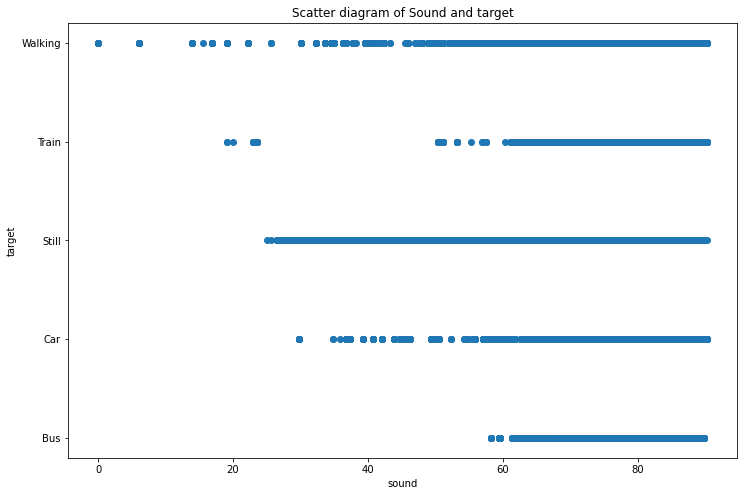

In [30]:
x = df_copy['sound#mean']
y = df_copy['target']

plt.figure(figsize=(12, 8))
plt.scatter(x,y)
plt.title('Scatter diagram of Sound and target')
plt.xlabel('sound')
plt.ylabel('target')
plt.savefig('Scatter diagram of Sound and target.jpg')

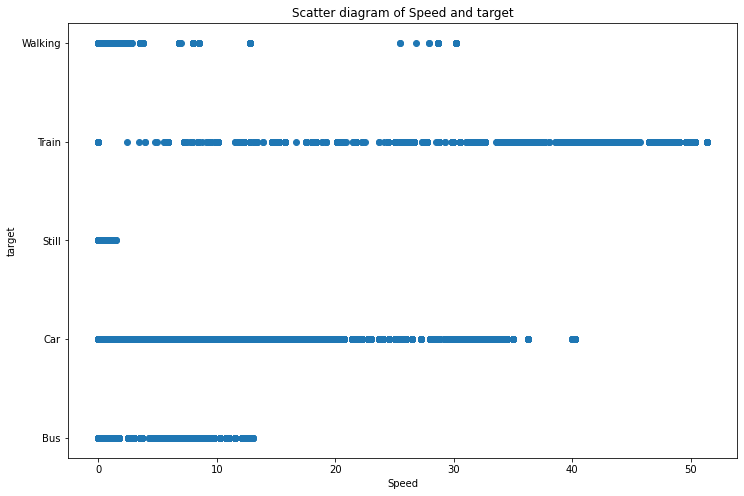

In [31]:
x = df_copy['speed#mean']
y = df_copy['target']

plt.figure(figsize=(12, 8))
plt.scatter(x,y)
plt.title('Scatter diagram of Speed and target')
plt.xlabel('Speed')
plt.ylabel('target')
plt.savefig('Scatter diagram of Speed and target.jpg')